In [1]:
!pip install -q -U 'tensorflow-text==2.8.*'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 41.4 MB/s eta 0:00:00


In [2]:
!pip install -q tf-models-official

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 32.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import re
import time
import unicodedata
import datetime
import pathlib
import json

from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras import layers

import tensorflow_hub as hub
import tensorflow_models as tfm

import tensorflow_text as text
from tensorflow_text.tools.wordpiece_vocab import bert_vocab_from_dataset as bert_vocab

In [5]:
tf.get_logger().setLevel('ERROR')
tf.config.run_functions_eagerly(True)

## Parametri BERT

In [6]:
bert_model_name = 'distilbert_multi_cased_L-6_H-768_A-12/1'  
tfhub_handle_preprocess = 'https://tfhub.dev/jeongukjae/distilbert_multi_cased_preprocess/2'
tfhub_handle_encoder =  'https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1'

print('BERT model selected                : ', tfhub_handle_encoder)

BERT model selected                :  https://tfhub.dev/jeongukjae/distilbert_multi_cased_L-6_H-768_A-12/1


### Variabili Globali

In [7]:
# PARAMETRI GLOBALI
root_folder = 'drive/MyDrive/BERT/'

# DATI
data_folder_name = 'data'
train_filename = 'dataset_dantesco.csv'
# train_filename = 'train_dataset_dantesco.csv'

DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))
# data_filenamepath = os.path.abspath(os.path.join(DATA_PATH, data_filename))
train_data_filenamepath = os.path.abspath(os.path.join(DATA_PATH, train_filename))

# PATH LOG Tensorboard
PATH_LOG = 'logs/fit/transformer_multi_bert_dante'
PATH_LOG = os.path.abspath(os.path.join(root_folder, PATH_LOG))
log_dir =  os.path.abspath(os.path.join(PATH_LOG, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))) 
log_history = os.path.abspath(os.path.join(PATH_LOG, 'histrory.json'))

# PATH WEIGHTS Tensorboard
PATH_WEIGHTS = 'weights/transformer_multi_bert_dante'
PATH_WEIGHTS = os.path.abspath(os.path.join(root_folder, PATH_WEIGHTS))
checkpoint_path = os.path.abspath(os.path.join(PATH_WEIGHTS, 'cp.ckpt'))

# VOCABOLARIO
vocab_folder = 'vocab'
multilingual_vocab_finalname = 'multilingual_vocab_dante.txt'
dan_vocab_finalname = 'dan_vocab_dante.txt'

VOCAB_PATH = os.path.abspath(os.path.join(root_folder, vocab_folder))
multilingual_vocab_filenamepath = os.path.abspath(os.path.join(VOCAB_PATH, multilingual_vocab_finalname))
dan_vocab_filenamepath = os.path.abspath(os.path.join(VOCAB_PATH, dan_vocab_finalname))

In [8]:
# parametri per il modello
ORIGINAL_COLUMN = 'Original'
TRANSLATE_COLUMN = 'Translate'

# parametri per il modello
NUM_SAMPLES = 90146	 
TRAIN = 63008
VALIDATION = 27008
N_VALIDATION = 1
TEST = 130

MAX_VOCAB_SIZE = 30000 
EMBEDDING_DIM = 128
HIDDEN_DIM = 1024 # numero di celle nei layer ricorrenti nascosti

BATCH_SIZE = 32
BUFFER_SIZE = 2000
MAX_SEQ_LENGTH = 128

NUM_LAYERS = 1 # Numero di layer di Decoder del Transformer
NUM_HEADS = 8 # Numero di meccanismi di multi-head attention
FF_DIM = 16 # Numero di celle dei Layer Feed Forward
DROPUOT = 0.5

# Ottimizzatore Adam
LEARNING_RATE_ADAM = 1e-4
BETA_1 = 0.66
BETA_2 = 0.999
EPOCHS_ADAM = 10

# IMPOSTO IL DEBUG A TRUE 
debug = True
training = True

## DATASET

### Caricamento Dati

In [9]:
# def unicode_to_ascii(s):
#   return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
  '''
  Preprocessing dei testi di input, impostando tutti i caratteri
  minuscoli, aggiungendo uno spazio prima di ogni punto e sostituendo
  qualsiasi carattere con uno spazio se non è compreso nel seguente elenco:
  (a-z, A-Z, ".", "?", "!", ",", "'", "’")
  '''
  #w = unicode_to_ascii(w.lower().strip())

  # inserimento di uno spazio tra ogni parola e il successivo punto,
  # punto esclamativo, punto interrogativo e virgola
  # esempio: "ciao, come và?" => "ciao , come và ?"
  w = re.sub(r"([?.!,])", r" \1 ", w) # inserimento di uno spazio

  # sostituzione dei caratteri apostrofo
  w = re.sub(r"([’]+)", "'", w)

  w = w.replace("á", "à")
  w = w.replace("é", "è")
  w = w.replace("í", "ì")
  w = w.replace("ó", "ò")
  w = w.replace("ú", "ù")

  # sostituzione dei caratteri non desiderati con uno spazio
  w = re.sub(r"([^a-zA-Z?.!,'àèìòù]+)", " ", w)

  # inserimento di uno spazio dopo apostrofo
  w = re.sub(r"(['])", r"\1 ", w) 

  w = w.replace(" ' ", " '")

  w = re.sub(r'[" "]+', " ", w) # rimozione di più spazi consecutivi
  return w

In [10]:
df = pd.read_csv(
  train_data_filenamepath,
  usecols=[ORIGINAL_COLUMN, TRANSLATE_COLUMN]
)
# Mischio il dataset in modo che sia più uniforme tra train e test
df = df.iloc[np.random.permutation(df.index)].reset_index(drop=True)

# Preprocessing dei dati di Input
input_data = df[TRANSLATE_COLUMN].apply(lambda x : preprocess_sentence(x)).tolist()

# Preprocessing dei dati Target con aggiunta del token di fine frase
target_data = df[ORIGINAL_COLUMN].apply(lambda x : preprocess_sentence(x)).tolist()

train_input_data = input_data[:TRAIN]
train_target_data = target_data[:TRAIN]

validation_input_data = input_data[TRAIN:TRAIN+VALIDATION]
validation_target_data = target_data[TRAIN:TRAIN+VALIDATION]

test_input_data = input_data[TRAIN+VALIDATION:TRAIN+VALIDATION+TEST]
test_target_data = target_data[TRAIN+VALIDATION:TRAIN+VALIDATION+TEST]

print(f'Dati totali presenti nel Dataset               : {len(df)}')
print(f'Dati totali presenti nel Dataset di Train      : {len(train_input_data)}')
print(f'Dati totali presenti nel Dataset di Validation : {len(validation_input_data)}')
print(f'Dati totali presenti nel Dataset di Test       : {len(test_input_data)}\n')


print('-----------TRAIN SET--------------')
print(train_input_data[-4:])
print(train_target_data[-4:])
print('-----------VALIDATION SET---------------')
print(validation_input_data[-4:])
print(validation_target_data[-4:])
print('-----------TEST SET---------------')
print(test_input_data[-4:])
print(test_target_data[-4:])

Dati totali presenti nel Dataset               : 90147
Dati totali presenti nel Dataset di Train      : 63008
Dati totali presenti nel Dataset di Validation : 27008
Dati totali presenti nel Dataset di Test       : 130

-----------TRAIN SET--------------
['Et je partirai sur le chemin droit , ', 'Volviò la cabeza donde Lucifer tenìa las piernas , y se aferrò a su pelo como alguien que sube , asì que pensè que volvìamos al infierno . ', 'I have the certainty of the value of this polished and well rounded coin . ', 'Por voluntad del Emperador , tienes el privilegio de conocer a sus altos dignatarios en la habitaciòn màs secreta antes de pasar a la vida . ']
["Ed i' sì me ne vo 'l dritto camino , ", " volse la testa ov' elli avea le zanche , e aggrappossi al pel com' om che sale , sì che 'n inferno i' credea tornar anche", " Sì ho , sì lucida e sì tonda , che nel suo conio nulla mi s' inforsa ", " Poi che per grazia vuol che tu t' affronti lo nostro Imperadore , anzi la morte , ne l' aula 

### Analisi Dati

In [11]:
print(f'Esempi nel Dataset di Train                            : {len(train_input_data)}')
print(f'Frase più corta in nel Dataset di Train                : {min(train_input_data, key = len)}')
print(f'Frase più corta in Dantesco nel Dataset di Train       : {min(train_target_data, key = len)}')
print(f'Frase più lunga in nel Dataset di Train                : {max(train_input_data, key = len)}')
print(f'Frase più lunga in Dantesco nel Dataset di Train       : {max(train_target_data, key = len)}')
print('---------------------------------------------------------------------------------------')
print(f'Esempi nel Dataset di Validation                       : {len(validation_input_data)}')
print(f'Frase più corta in nel Dataset di Validation           : {min(validation_input_data, key = len)}')
print(f'Frase più corta in Dantesco nel Dataset di Validation  : {min(validation_target_data, key = len)}')
print(f'Frase più lunga in nel Dataset di Validation           : {max(validation_input_data, key = len)}')
print(f'Frase più lunga in Dantesco nel Dataset di Validation  : {max(validation_target_data, key = len)}')
print('---------------------------------------------------------------------------------------')
print(f'Esempi nel Dataset di Test                             : {len(test_input_data)}')
print(f'Frase più corta in nel Dataset di Test                 : {min(test_input_data, key = len)}')
print(f'Frase più corta in Dantesco nel Dataset di Test        : {min(test_target_data, key = len)}')
print(f'Frase più lunga in nel Dataset di Test                 : {max(test_input_data, key = len)}')
print(f'Frase più lunga in Dantesco nel Dataset di Test        : {max(test_target_data, key = len)}')

Esempi nel Dataset di Train                            : 63008
Frase più corta in nel Dataset di Train                : Y yo
Frase più corta in Dantesco nel Dataset di Train       :  E io
Frase più lunga in nel Dataset di Train                : Il me dit Bèatrice , louange authentique de Dieu , pourquoi ne secourez vous pas celui qui t' a aimè au point de s' èlever au dessus de la troupe vulgaire ? N' entendez vous pas l' angoisse de ses pleurs ? Ne voyez vous pas la mort qui combat sur le joug orageux du pèchè ? Il n' y eut jamais au monde des gens si rapides pour poursuivre leur avantage ou pour fuir leur dommage , que j' ai entendu ces paroles , et je suis venu ici de mon bouclier cèleste , en me confiant à tes nobles paroles qui t' honorent , toi et ceux qui les ont entendues . 
Frase più lunga in Dantesco nel Dataset di Train       :  E già venìa su per le torbide onde un fracasso d' un suon , pien di spavento , per cui tremavano amendue le sponde , non altrimenti fatto che d' un 

## Tokenizer

Creo due differenti tokenizer che mi servizranno per la predisposizione dei dati di input:


*   EncTokenizer classe custom per la tokenizzazione dei dati di input al Layer di Encoder di Bert
*   DecTokenizer classe custom per la tokenizzazione dei dati di input al Layer di Decoder



In [12]:
dataset = tf.data.Dataset.from_tensor_slices((input_data, target_data))
dataset = dataset.shuffle(len(input_data)).batch(BATCH_SIZE, drop_remainder=True)

train_multilingual = dataset.map(lambda multilingual, dan: multilingual)
train_dan = dataset.map(lambda multilingual, dan: dan)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [13]:
def write_vocab_file(filepath, vocab):
  with open(filepath, 'w') as f:
    for token in vocab:
      print(token, file=f)

In [14]:
def cleanup_text(reserved_tokens, token_txt):

  # Drop the reserved tokens, except for "[UNK]".
  bad_tokens = [re.escape(tok) for tok in reserved_tokens if tok != "[UNK]"]
  bad_token_re = "|".join(bad_tokens)

  bad_cells = tf.strings.regex_full_match(token_txt, bad_token_re)
  result = tf.ragged.boolean_mask(token_txt, ~bad_cells)

  # Join them into strings.
  result = tf.strings.reduce_join(result, separator=' ', axis=-1)

  return result

In [15]:
tokenizers = tf.Module()

### Classe EncTokenizer

Classe custom per la tokenizzazione dei dati di Dante e che crea i tre vettori necessari al layer di Encoder 
Bert:


*   input_word_ids
*   input_type_ids
*   input_mask





In [16]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens = {
    'start_of_sequence_id': 101,
    'end_of_segment_id': 102,
    'padding_id': 0,
    'mask_id': 103
}

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = MAX_VOCAB_SIZE,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [17]:
exist_vocab = Path(multilingual_vocab_filenamepath)

if not exist_vocab.exists():
  multilingual_vocab = bert_vocab.bert_vocab_from_dataset(
      train_multilingual.batch(MAX_VOCAB_SIZE).prefetch(tf.data.AUTOTUNE),
      **bert_vocab_args
  )

  write_vocab_file(multilingual_vocab_filenamepath, multilingual_vocab)

In [18]:
class EncTokenizer(tf.Module):
  def __init__(self, tfhub_handle_preprocess):
    self.preprocessor = hub.KerasLayer(tfhub_handle_preprocess)
    
  @tf.function
  def tokenize(self, strings):
    return self.preprocessor(strings)


In [19]:
tokenizers.multilingual = EncTokenizer(tfhub_handle_preprocess)

### Classe DecTokenizer

Classe custom per la tokenizzazione dei dati in lingua italiana per il layer di Decoder


In [20]:
bert_tokenizer_params=dict(lower_case=True)
reserved_tokens_vocab=["[PAD]", "[UNK]", "[START]", "[END]"]

bert_vocab_args = dict(
    # The target vocabulary size
    vocab_size = MAX_VOCAB_SIZE,
    # Reserved tokens that must be included in the vocabulary
    reserved_tokens=reserved_tokens_vocab,
    # Arguments for `text.BertTokenizer`
    bert_tokenizer_params=bert_tokenizer_params,
    # Arguments for `wordpiece_vocab.wordpiece_tokenizer_learner_lib.learn`
    learn_params={},
)

In [21]:
exist_vocab = Path(dan_vocab_filenamepath)

if not exist_vocab.exists():
  dan_vocab = bert_vocab.bert_vocab_from_dataset(
      train_dan.batch(MAX_VOCAB_SIZE).prefetch(tf.data.AUTOTUNE),
      **bert_vocab_args
  )

  write_vocab_file(dan_vocab_filenamepath, dan_vocab)

In [22]:
START = tf.argmax(tf.constant(reserved_tokens_vocab) == "[START]")
END = tf.argmax(tf.constant(reserved_tokens_vocab) == "[END]")

def add_start_end(ragged):
  count = ragged.bounding_shape(out_type=tf.int32)[0]

  starts = tf.fill([count,1], START)
  starts = tf.cast(starts, tf.int32)

  ends = tf.fill([count,1], END)
  ends = tf.cast(ends, tf.int32)

  x = tf.concat([starts, ragged, ends], axis=1)
  return x

In [23]:
class DecTokenizer(tf.Module):
  def __init__(self, reserved_tokens_vocab, vocab_path):
    self.tokenizer = text.BertTokenizer(vocab_path, lower_case=True, token_out_type=tf.int32)
    self._reserved_tokens_vocab = reserved_tokens_vocab
    self._vocab_path = tf.saved_model.Asset(vocab_path)

    vocab = pathlib.Path(vocab_path).read_text().splitlines()
    self.vocab = tf.Variable(vocab)

    ## Create the signatures for export:   

    # Include a tokenize signature for a batch of strings. 
    self.tokenize.get_concrete_function(
        tf.TensorSpec(shape=[None], dtype=tf.string))
    
    # Include `detokenize` and `lookup` signatures for:
    #   * `Tensors` with shapes [tokens] and [batch, tokens]
    #   * `RaggedTensors` with shape [batch, tokens]
    self.detokenize.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int32))
    self.detokenize.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32))

    self.lookup.get_concrete_function(
        tf.TensorSpec(shape=[None, None], dtype=tf.int32))
    self.lookup.get_concrete_function(
          tf.RaggedTensorSpec(shape=[None, None], dtype=tf.int32))

    # These `get_*` methods take no arguments
    self.get_vocab_size.get_concrete_function()
    self.get_vocab_path.get_concrete_function()
    self.get_reserved_tokens.get_concrete_function()
    
  @tf.function
  def tokenize(self, strings):
    enc = self.tokenizer.tokenize(strings)
    # Merge the `word` and `word-piece` axes.
    enc = enc.merge_dims(-2,-1)
    enc = add_start_end(enc)
    return enc

  @tf.function
  def detokenize(self, tokenized):
    words = self.tokenizer.detokenize(tokenized)
    return cleanup_text(self._reserved_tokens_vocab, words)

  @tf.function
  def lookup(self, token_ids):
    return tf.gather(self.vocab, token_ids)

  @tf.function
  def get_vocab_size(self):
    return tf.shape(self.vocab)[0]

  @tf.function
  def get_vocab_path(self):
    return self._vocab_path

  @tf.function
  def get_reserved_tokens(self):
    return tf.constant(self._reserved_tokens_vocab)

In [24]:
tokenizers.dan = DecTokenizer(reserved_tokens_vocab, dan_vocab_filenamepath)

### Analisi Dati Tokenizzati

In [25]:
print(f'Vocabolario Dantesco : {tokenizers.dan.get_vocab_size()}')

Vocabolario Dantesco : 15254


In [26]:
print(input_data[-2:])
print(tokenizers.multilingual.tokenize(input_data[-2:])['input_word_ids'][:, :])
print('------------------------------------------------------------------')
print(target_data[-2:])
print(tokenizers.dan.tokenize(target_data[-2:]))

['Here Frederick Novello prayed with his hands , and the Pisan who made the good Marzucco , his father , appear strong . ', 'And if there is , it brings the arrhythmia . ']
tf.Tensor(
[[  101 18249 17132 50928 10715 69857 68159 10169 10226 27925   117 10111
  10105 37749 10115 10479 11019 10105 15198 15734 13078 20493   117 10226
  13194   117 22641 18093   119   102     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]
 [  101 12689 12277 11155

In [27]:
print([min(train_input_data, key = len)])
print(tokenizers.multilingual.tokenize([min(train_input_data, key = len)])['input_word_ids'][:, :32])
print('------------------------------------------------------------------')
print([min(train_target_data, key = len)])
print(tokenizers.dan.tokenize([min(train_target_data, key = len)]))

['Y yo']
tf.Tensor(
[[  101   162 13672   102     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 32), dtype=int32)
------------------------------------------------------------------
[' E io']
<tf.RaggedTensor [[2, 13, 42, 3]]>


In [28]:
print([max(train_input_data, key = len)])
print(tokenizers.multilingual.tokenize([max(train_input_data, key = len)])['input_word_ids'])
print('------------------------------------------------------------------')
print([max(train_target_data, key = len)])
print(tokenizers.dan.tokenize([max(train_target_data, key = len)]))

["Il me dit Bèatrice , louange authentique de Dieu , pourquoi ne secourez vous pas celui qui t' a aimè au point de s' èlever au dessus de la troupe vulgaire ? N' entendez vous pas l' angoisse de ses pleurs ? Ne voyez vous pas la mort qui combat sur le joug orageux du pèchè ? Il n' y eut jamais au monde des gens si rapides pour poursuivre leur avantage ou pour fuir leur dommage , que j' ai entendu ces paroles , et je suis venu ici de mon bouclier cèleste , en me confiant à tes nobles paroles qui t' honorent , toi et ceux qui les ont entendues . "]
tf.Tensor(
[[   101  10282  10911  11690    139  89675  20416    117  10406  43383
   10112  49523  14786  19224  10104  27562    117  85539  10554  96004
   12101  10305  24931  10801  14872  10355    188    112    169  56048
   13340  10257  12331  10104    187    112    262  62314  10257  29272
   10104  10109  68545  15632  49382  11627    136    151    112  61578
   30131  24931  10801    180    112  10488  19636  10341  10104  10974
   2

## Creazione dataset
Utilizzo della libreria tf.data per la gestione del dataset da utilizzare.
Verranno creati batch di esempi che verranno utilizzati durante l'addestramento.

In [29]:
def prepare_batch(multilingual, dan):
  zero = tf.zeros([BATCH_SIZE, MAX_SEQ_LENGTH], tf.int32)

  # Tokenizzo l'input per l'Encoder
  encoder = tokenizers.multilingual.tokenize(multilingual)          

  # Tokenizzo l'input per il Decder e creo la variabile Target
  dan = tokenizers.dan.tokenize(dan)
  decoder = dan[:, :-1].to_tensor()  # Drop the [END] tokens
  target = dan[:, 1:].to_tensor()   # Drop the [START] tokens
  
  decoder = tf.concat([decoder, zero], 1)
  decoder = decoder[:, :(MAX_SEQ_LENGTH)]

  target = tf.concat([target, zero], 1)
  target = target[:, :(MAX_SEQ_LENGTH)]

  return (encoder, decoder), target

In [30]:
def make_batches(ds):
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

In [31]:
# Suddivido il dataset di validation in n parti per effettuare una validation incrociata
num_record_validation = len(validation_input_data) / N_VALIDATION
val_input_data = []
val_target_data = []

for i in range(N_VALIDATION):
  df_input = validation_input_data[int((i*num_record_validation)):int(((i+1)*num_record_validation))]
  df_target = validation_target_data[int((i*num_record_validation)):int(((i+1)*num_record_validation))]

  val_input_data.append(df_input)
  val_target_data.append(df_target)

In [32]:
# Definizione del dataset
# [from_tensor_slices] permette di recuperare batch
# di esempi dai dataset di riferimento
train_dataset = tf.data.Dataset.from_tensor_slices((train_input_data, train_target_data))
validation_dataset = [tf.data.Dataset.from_tensor_slices((val_input, val_target)) 
                            for val_input, val_target in zip(val_input_data, val_target_data)]

# impostazione del recupero di esempi presi in maniera
# casuale in gruppi di [BATCH_SIZE] tra quelli disponibili
train_dataset = make_batches(train_dataset)
validation_dataset = [make_batches(val_dataset) for val_dataset in validation_dataset]

In [33]:
# Recupero un batch di esempi per la verifica delle classi custom che andrò a creare
for (enc_input, dec_input), target in train_dataset.take(1):
  print('----------------------- ENCODER  -------------------------------')
  print(f'Shape                    : {enc_input["input_word_ids"].shape}')
  print(f'Word Ids                 : {enc_input["input_word_ids"][0, :MAX_SEQ_LENGTH]}')
  print(f'Input Mask               : {enc_input["input_mask"][0, :MAX_SEQ_LENGTH]}')
  print('--------------------- DECODER ----------------------------------')
  print(f'Shape it input           : {dec_input.shape}')
  print(f'Example it input         : {dec_input[0]}')  
  print('--------------------- TARGET -----------------------------------')
  print(f'Shape it input           : {target.shape}')
  print(f'Example it target        : {target[0]}')  

----------------------- ENCODER  -------------------------------
Shape                    : (32, 128)
Word Ids                 : [   101  72337  68712  10107  53994    181  10911  10141  29233  10121
  13055  10146  60803    254  10119 106952  12127  20276  16428  12291
    117  10294  13055  10196  29094  10257  10229 109067    119    102
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0     

## Encoder BERT

Predispondo la classe necessaria per la costruzione di BERT


In [34]:
class EncoderBert(layers.Layer):
  def __init__(self, bert_encoder, embedding_dim, max_len):
    super(EncoderBert, self).__init__()

    self.encoder = hub.KerasLayer(bert_encoder, name='BERT_encoder', trainable=False)

    self.conv_1 = tf.keras.layers.Conv1D(embedding_dim * 4, 1, activation='relu') 
    self.conv_2 = tf.keras.layers.Conv1D(embedding_dim, 1, activation='relu') 
    self.lambda_layer = tf.keras.layers.Lambda(lambda x: x[:,:max_len])
    self.max_len = max_len

  def call(self, x, debug=False):

    if debug:
      print(f'****************** DEBUG ENCODER BERT ******************')
      print(f"First example")
      print(f'Keys                         : {list(x.keys())}')
      print(f'Shape                        : {x["input_word_ids"].shape}')
      print(f'Word Ids                     : {x["input_word_ids"][0, :16]}')
      print(f'Input Mask                   : {x["input_mask"][0, :16]}')
      
    x = self.encoder(x)['sequence_output'] 
    # encoder_outputs stato intermedio di BERT prima che esegua la traduzione recuperare la metà della lunghezza
    # x = self.encoder(x)['encoder_outputs'] 
    # x = x[int(len(x) / 2) - 1]

    if debug:
      print()
      print(f'Encoder Outputs BERT Shape   : {x.shape}')
      print(f'Encoder Outputs BERT Values  : {x[0, :1, :16]}')

    x = self.conv_1(x)
    if debug:
      print()
      print(f'Sequence Conv1 Shape         : {x.shape}')

    x = self.conv_2(x)
    if debug:
      print(f'Sequence Conv2 Shape         : {x.shape}')

    x = self.lambda_layer(x)
    if debug:
      print(f'Sequence Lambda Layer        : {x.shape}')
      print()
      print(f'Sequence Outputs Values      : {x[0, 0, :16]}')      
      print('*********************************************************') 

    return x

In [35]:
encoder_bert = EncoderBert(tfhub_handle_encoder, 
                           EMBEDDING_DIM, 
                           MAX_SEQ_LENGTH)

bert_outputs = encoder_bert(enc_input, debug) 

****************** DEBUG ENCODER BERT ******************
First example
Keys                         : ['input_mask', 'input_word_ids']
Shape                        : (32, 128)
Word Ids                     : [   101  72337  68712  10107  53994    181  10911  10141  29233  10121
  13055  10146  60803    254  10119 106952]
Input Mask                   : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Encoder Outputs BERT Shape   : (32, 128, 768)
Encoder Outputs BERT Values  : [[-0.05709609  0.19458449 -0.27603272  0.24358062 -0.08327115  0.07331642
  -0.15306893 -0.03293055  0.04231155  0.40886202  0.12642454 -0.22848615
   0.06632483  0.17554605 -0.55116767  0.01793845]]

Sequence Conv1 Shape         : (32, 128, 512)
Sequence Conv2 Shape         : (32, 128, 128)
Sequence Lambda Layer        : (32, 128, 128)

Sequence Outputs Values      : [0.72470707 0.         0.         0.5826957  0.42253435 0.
 0.         0.14755176 0.         0.7433855  0.21495731 0.
 0.         0.         0.         0.        ]


## Decoder

Predispondo la classe necessaria per la costruzione di un Layer di Decoder

### TOKEN AND POSITION EMBEDDING

Implementazione del blocco Embedding per l'utilizzo di vettori posizionali insieme ai vettori di token di parole tramite estensione della classe Layer di Keras. 

In [36]:
class TokenAndPositionEmbedding(layers.Layer):
  def __init__(self, maxlen, vocab_size, embed_dim):
    super(TokenAndPositionEmbedding, self).__init__()
    self.maxlen = maxlen
    self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
    self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

  def call(self, x, debug=False):
    x = keras.preprocessing.sequence.pad_sequences(x, maxlen=self.maxlen, padding='post')
    maxlen = tf.shape(x)[-1]

    if debug:
      print('********** DEBUG TOKEN AND POSITION EMBEDDING ***********')
      print(f'Sequence Max len                          : {maxlen}')
      print(f'Sequence Shape                            : {tf.shape(x)}')

    positions = tf.range(start=0, limit=maxlen, delta=1)
    positions = self.pos_emb(positions)
    x = self.token_emb(x)
    output = x + positions

    if debug:
      print(f'Shape TokenAndPositionEmbedding           : {output.shape}')
      print('*********************************************************')

    return output

In [37]:
token_position_it = TokenAndPositionEmbedding(MAX_SEQ_LENGTH, tokenizers.dan.get_vocab_size(), EMBEDDING_DIM)

inputs_decoder = token_position_it(dec_input, debug)

********** DEBUG TOKEN AND POSITION EMBEDDING ***********
Sequence Max len                          : 128
Sequence Shape                            : [ 32 128]
Shape TokenAndPositionEmbedding           : (32, 128, 128)
*********************************************************


### LAYER DECODER

Implementazione di un blocco di DecoderTransformer tramite estensione della classe Layer di Keras

#### DecodeBert

Implmentazione di un blocco di  decodifica custom per decodificare l'output dal layer EncoderBert prima di passarlo al Decoder del Transformer tramite estensione della classe Layer di Keras

In [38]:
class DecodeBert(layers.Layer):
  def __init__(self, max_len, embed_dim, num_heads, ff_dim, rate=0.5, name='DecodeBert'):
    super(DecodeBert, self).__init__()
    self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    self.ffn = keras.Sequential(
      [layers.Dense(ff_dim, activation='relu'), layers.Dense(embed_dim),]
    )
    self.layernorm1 = layers.LayerNormalization()
    self.layernorm2 = layers.LayerNormalization()
    self.dropout1 = layers.Dropout(rate)
    self.dropout2 = layers.Dropout(rate)
    self._name = name

  def call(self, bert_outputs, training=False, debug=False):
    attn_output = self.att(query=bert_outputs,
                           value=bert_outputs, 
                           key=bert_outputs)
    
    attn_output = self.dropout1(attn_output)
    out1 = self.layernorm1(bert_outputs + attn_output)

    ffn_output = self.ffn(out1)
    ffn_output = self.dropout2(ffn_output, training=training)

    output = self.layernorm2(out1 + ffn_output)

    if debug:
      print('********************* DEBUG DECODE-BERT *********************')
      print(f'Shape Input Layer Decode-Bert       : {bert_outputs.shape}')
      print(f'Shape Output Layer Decode-Bert      : {output.shape}')
      print('*********************************************************')

    return output

In [39]:
encoder = DecodeBert(MAX_SEQ_LENGTH, 
                  EMBEDDING_DIM, 
                  NUM_HEADS, 
                  FF_DIM, 
                  DROPUOT)

outputs_encoder = encoder(bert_outputs=bert_outputs,
                          training=training, 
                          debug=debug)

********************* DEBUG DECODE-BERT *********************
Shape Input Layer Decode-Bert       : (32, 128, 128)
Shape Output Layer Decode-Bert      : (32, 128, 128)
*********************************************************


#### Layer Decoder

In [40]:
class Decoder(layers.Layer):
  def __init__(self, max_len, embed_dim, num_heads, ff_dim, rate=0.5, name='DEC'):
    super(Decoder, self).__init__()
    self.decode_bert = DecodeBert(max_len=max_len, embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim, rate=rate)
    self.att1 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    self.att2 = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    self.ffn = keras.Sequential(
      [layers.Dense(ff_dim, activation='relu'), layers.Dense(embed_dim),]
    )
    self.layernorm1 = layers.LayerNormalization()
    self.layernorm2 = layers.LayerNormalization()
    self.layernorm3 = layers.LayerNormalization()
    self.dropout1 = layers.Dropout(rate)
    self.dropout2 = layers.Dropout(rate)
    self.dropout3 = layers.Dropout(rate)
    self._name = name

  def call(self, inputs, bert_outputs, training=False, debug=False):
    attn_output1 = self.att1(query=inputs,
                             value=inputs, 
                             key=inputs, 
                             use_causal_mask=True)
    
    attn_output1 = self.dropout1(attn_output1)
    out1 = self.layernorm1(inputs + attn_output1)

    dec_bert = self.decode_bert(bert_outputs=bert_outputs, training=training, debug=debug)

    attn_output2 = self.att2(key=dec_bert, 
                             value=dec_bert, 
                             query=out1)
    
    attn_output2 = self.dropout2(attn_output2, training=training)
    out2 = self.layernorm2(out1 + attn_output2)

    ffn_output = self.ffn(out2)
    ffn_output = self.dropout3(ffn_output, training=training)

    output = self.layernorm3(out2 + ffn_output)

    if debug:
      print('******************* DEBUG DECODER ***********************')
      print(f'Input Shape                       : {inputs.shape}')
      print(f'Shape Outputs Decoder             : {output.shape}')
      print('*********************************************************')

    return output

In [41]:
decoder = Decoder(MAX_SEQ_LENGTH, 
                  EMBEDDING_DIM, 
                  NUM_HEADS, 
                  FF_DIM, 
                  DROPUOT)

outputs_decoder = decoder(inputs=inputs_decoder, 
                          bert_outputs=bert_outputs,  
                          training=training,
                          debug=debug)

********************* DEBUG DECODE-BERT *********************
Shape Input Layer Decode-Bert       : (32, 128, 128)
Shape Output Layer Decode-Bert      : (32, 128, 128)
*********************************************************
******************* DEBUG DECODER ***********************
Input Shape                       : (32, 128, 128)
Shape Outputs Decoder             : (32, 128, 128)
*********************************************************


## TRANSFORMER

Implementazione del blocco Transformer tramite estensione della classe Layer di Keras.

In [42]:
class TransformerBlock(keras.Model):
  def __init__(self, 
               num_layers, 
               embed_dim, 
               num_heads, 
               ff_dim, 
               max_len,
               vocab_size,
               tfhub_handle_encoder,
               rate=0.5):
    
    super(TransformerBlock, self).__init__()

    self.num_layers = num_layers

    self.token_pos_dec = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)

    self.encoder = EncoderBert(tfhub_handle_encoder, embed_dim, max_len)
    self.decoder = [Decoder(max_len, embed_dim, num_heads, ff_dim, rate) for _ in range(num_layers)]

    self.dropout = layers.Dropout(rate)
    self.final_layer = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, training=False, debug=False):
    inputs_encoder, inputs_decoder  = inputs

    encoder_output = self.encoder(inputs_encoder, debug) 

    inputs_decoder = self.token_pos_dec(inputs_decoder, debug)

    if debug:
      print(f'---------------- DEBUG TRANSFORMER BLOCK ----------------')
      print(f'inputs_encoder       : {inputs_encoder["input_word_ids"].shape}')
      print(f'inputs_decoder       : {inputs_decoder.shape}')      

    transformer_output = inputs_decoder
      
    for i in range(self.num_layers):
      transformer_output = self.decoder[i](inputs=transformer_output, 
                                           bert_outputs=encoder_output, 
                                           training=training,
                                           debug=debug)

    transformer_output = self.dropout(transformer_output)
    logits = self.final_layer(transformer_output)

    if debug:
      print(f'Output Shape       : {logits.shape}')
      print(f'Output Transformer : {logits[0, :1, :12]}')    
      print(f'---------------------------------------------------------')

    return logits

In [43]:
transformer = TransformerBlock(NUM_LAYERS, 
                               EMBEDDING_DIM, 
                               NUM_HEADS, 
                               FF_DIM,
                               MAX_SEQ_LENGTH,
                               tokenizers.dan.get_vocab_size(),
                               tfhub_handle_encoder,
                               DROPUOT)

transformer_output = transformer((enc_input, dec_input), 
                                 training=training,
                                 debug=debug)

****************** DEBUG ENCODER BERT ******************
First example
Keys                         : ['input_mask', 'input_word_ids']
Shape                        : (32, 128)
Word Ids                     : [   101  72337  68712  10107  53994    181  10911  10141  29233  10121
  13055  10146  60803    254  10119 106952]
Input Mask                   : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Encoder Outputs BERT Shape   : (32, 128, 768)
Encoder Outputs BERT Values  : [[-0.05709609  0.19458449 -0.27603272  0.24358062 -0.08327115  0.07331642
  -0.15306893 -0.03293055  0.04231155  0.40886202  0.12642454 -0.22848615
   0.06632483  0.17554605 -0.55116767  0.01793845]]

Sequence Conv1 Shape         : (32, 128, 512)
Sequence Conv2 Shape         : (32, 128, 128)
Sequence Lambda Layer        : (32, 128, 128)

Sequence Outputs Values      : [0.         0.48080358 0.         0.05176076 0.0313204  0.
 0.         0.83166724 0.         0.58195674 0.25713447 0.
 0.         0.88243556 0.         0.        ]


In [44]:
transformer.summary()

Model: "transformer_block"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 token_and_position_embeddin  multiple                 1968896   
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 encoder_bert_1 (EncoderBert  multiple                 135193472 
 )                                                               
                                                                 
 DEC (Decoder)               multiple                  1592224   
                                                                 
 dropout_16 (Dropout)        multiple                  0         
                                                                 
 dense_10 (Dense)            multiple                  1967766   
                                                 

## Addestramento modello con ottimizzatore ADAM

### Compilazione

In [45]:
transformer.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE_ADAM, 
                                       beta_1=BETA_1, 
                                       beta_2=BETA_2),
    metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [46]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

# Create a callback Tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

# Create a callback save the log history
json_logging_callback = tf.keras.callbacks.LambdaCallback(
    on_epoch_end=lambda epoch, logs: json_log.write(
        json.dumps({'epoch': epoch, 
                    'loss': logs['loss'],
                    'sparse_categorical_accuracy': logs['sparse_categorical_accuracy'],
                    'val_loss': logs['val_loss'],
                    'val_sparse_categorical_accuracy': logs['val_sparse_categorical_accuracy']}) + '\n'),
    on_train_end=lambda logs: json_log.close()
)

### Addestramento 1

In [47]:
start = datetime.datetime.now()
initial_epoch = 0
epochs = EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])
  
  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 1/10
1969/1969 [==============================] - 1534s 777ms/step - loss: 1.5712 - sparse_categorical_accuracy: 0.8842 - val_loss: 0.7314 - val_sparse_categorical_accuracy: 0.8950
Epoch 2/10
1969/1969 [==============================] - 1518s 771ms/step - loss: 0.6840 - sparse_categorical_accuracy: 0.9014 - val_loss: 0.6805 - val_sparse_categorical_accuracy: 0.8983
Epoch 3/10
1969/1969 [==============================] - 1515s 769ms/step - loss: 0.6351 - sparse_categorical_accuracy: 0.9044 - val_loss: 0.6348 - val_sparse_categorical_accuracy: 0.9022
Epoch 4/10
1969/1969 [==============================] - 1514s 769ms/step - loss: 0.5984 - sparse_categorical_accuracy: 0.9068 - val_loss: 0.5895 - val_sparse_categorical_accuracy: 0.9063
Epoch 5/10
1969/1969 [==============================] - 1518s 771ms/step - loss: 0.5654 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.5463 - val_sparse_categorical_accuracy: 0.9095
Epoch 6/10
1969/1969 [==============================] - 1514s 769

### Addestramento 2

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
initial_epoch = 10
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 11/20
1135/1135 [==============================] - 831s 732ms/step - loss: 0.4716 - sparse_categorical_accuracy: 0.9198 - val_loss: 0.4887 - val_sparse_categorical_accuracy: 0.9159
Epoch 12/20
1135/1135 [==============================] - 879s 775ms/step - loss: 0.4614 - sparse_categorical_accuracy: 0.9206 - val_loss: 0.4789 - val_sparse_categorical_accuracy: 0.9169
Epoch 13/20
1135/1135 [==============================] - 832s 733ms/step - loss: 0.4529 - sparse_categorical_accuracy: 0.9213 - val_loss: 0.4670 - val_sparse_categorical_accuracy: 0.9181
Epoch 14/20
1135/1135 [==============================] - 832s 733ms/step - loss: 0.4445 - sparse_categorical_accuracy: 0.9220 - val_loss: 0.4571 - val_sparse_categorical_accuracy: 0.9190
Epoch 15/20
1135/1135 [==============================] - 830s 732ms/step - loss: 0.4374 - sparse_categorical_accuracy: 0.9228 - val_loss: 0.4497 - val_sparse_categorical_accuracy: 0.9196
Epoch 16/20
1135/1135 [==============================] - 879s 774

### Addestramento 3

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
initial_epoch = 30
EPOCHS_ADAM = 20
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

Epoch 31/50
750/750 [==============================] - 775s 1s/step - loss: 0.6435 - sparse_categorical_accuracy: 0.8899 - val_loss: 0.6635 - val_sparse_categorical_accuracy: 0.8883
Epoch 32/50
750/750 [==============================] - 785s 1s/step - loss: 0.6394 - sparse_categorical_accuracy: 0.8903 - val_loss: 0.6607 - val_sparse_categorical_accuracy: 0.8889
Epoch 33/50
750/750 [==============================] - 782s 1s/step - loss: 0.6355 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.6568 - val_sparse_categorical_accuracy: 0.8891
Epoch 34/50
750/750 [==============================] - 758s 1s/step - loss: 0.6307 - sparse_categorical_accuracy: 0.8910 - val_loss: 0.6554 - val_sparse_categorical_accuracy: 0.8892
Epoch 35/50
750/750 [==============================] - 776s 1s/step - loss: 0.6268 - sparse_categorical_accuracy: 0.8914 - val_loss: 0.6509 - val_sparse_categorical_accuracy: 0.8899
Epoch 36/50
750/750 [==============================] - 776s 1s/step - loss: 0.6230 - spars

### Addestramento 4

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [ ]:
start = datetime.datetime.now()
initial_epoch = 50
EPOCHS_ADAM = 20
epochs = initial_epoch + EPOCHS_ADAM

for val_dataset in validation_dataset:
  json_log = open(log_history, mode='a', buffering=1, encoding='utf-8')

  transformer.fit(train_dataset,
                  initial_epoch=initial_epoch,
                  epochs=epochs,
                  shuffle=True,
                  validation_data=val_dataset,
                  callbacks=[tensorboard_callback,
                             json_logging_callback, 
                             cp_callback])

  initial_epoch = epochs
  epochs = epochs + EPOCHS_ADAM


end = datetime.datetime.now()
print(f'Tempo necessario per l\'addestramento: {end - start}')

## Valutazione dell'addestramento
Avendo in output il log ed i risultati dell'addestramento, possiamo visualizzare
queste informazioni relativamente alle metriche di interesse.

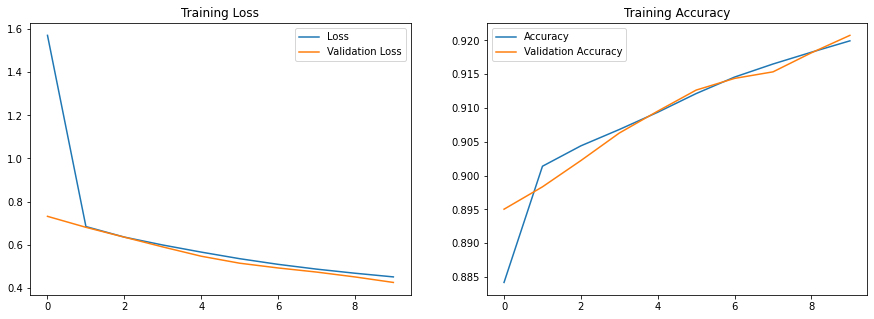

In [51]:
# Recupero il log di addestramento
df_history = pd.read_json(log_history, lines=True)

# visualizzazione andamento addestramento
# su un grafico composto da due sub-plot
# uno per il loss, l'altro per l'accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Errore durante l'addestramento
ax1.plot(df_history['loss'], label='Loss')
ax1.plot(df_history['val_loss'], label='Validation Loss')
ax1.set_title('Training Loss')
ax1.legend()

# Accuratezza durante l'addestramento
ax2.plot(df_history['sparse_categorical_accuracy'], label='Accuracy')
ax2.plot(df_history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
ax2.set_title('Training Accuracy')
ax2.legend()

plt.show()

## Test del modello
La seguente cella permette di caricare l'ultimo checkpoint dell'addestramento
precedentemente salvato.

In [ ]:
# Carico i pesi modello
latest = tf.train.latest_checkpoint(PATH_WEIGHTS)
transformer.load_weights(latest)

In [49]:
class Translate:
  def __init__(self, transformer_block, tokenizers):
    self.transformer = transformer_block
    self.tokenizers = tokenizers

  def predict(self, input_text, max_length):
    if input_text is None:
      input_text = input_data[np.random.choice(len(input_data))]
      print(input_text)

    inputs_bert = self.tokenizers.multilingual.tokenize(input_text)

    start_end = self.tokenizers.dan.tokenize([''])[0]
    start = (start_end[0][tf.newaxis]).numpy()[0]
    end = (start_end[1][tf.newaxis]).numpy()[0]

    output_array = tf.TensorArray(dtype=tf.int32, size=max_length, dynamic_size=True)
    output_array = output_array.write(0, tf.constant([start]))     

    out_words = []

    for i in tf.range(max_length):
      # decodifica e recupero probabilità di output
      output = tf.transpose(output_array.stack())

      transformer_output = transformer((inputs_bert, output), 
                                        training=False,
                                        debug=False)

      predictions = transformer_output[:, -1:, :]

      # selezione della parola più probabile
      predict = tf.argmax(predictions, -1)
      pred_values = (K.argmax(transformer_output, axis=-1)).numpy()
    
      # inserimento della parola nella sequenza di output
      output_array = output_array.write(i+1, [pred_values[0][i]])

      if pred_values[0][i] == end:
        break

    output = tf.transpose(output_array.stack())
    text = tokenizers.dan.detokenize(output)[0]  
    tokens = tokenizers.dan.lookup(output)[0]

    return text, tokens

In [50]:
test_sequences = [test_input_data[2], test_input_data[26], test_input_data[19], 
                  test_input_data[34], test_input_data[45], test_input_data[58], 
                  test_input_data[62], test_input_data[71], test_input_data[84],
                  test_input_data[90], test_input_data[99], test_input_data[0]]

target_sequences = [test_target_data[2], test_target_data[26], test_target_data[19], 
                    test_target_data[34], test_target_data[45], test_target_data[58], 
                    test_target_data[62], test_target_data[71], test_target_data[84],
                    test_target_data[90], test_target_data[99], test_target_data[0]]


translate = Translate(transformer_block=transformer,
                      tokenizers=tokenizers)

for test_sequence, target in zip(test_sequences, target_sequences):
  text, token = translate.predict(tf.constant([test_sequence]), MAX_SEQ_LENGTH)

  print(f'{"Input":15s}: {test_sequence}')
  print(f'{"Target":15s}: {target}')
  print(f'{"Prediction":15s}: {text.numpy().decode("utf-8")}')  
  print('---------------------------------------------')


Input          : And my teacher
Target         :  E 'l mio maestro
Prediction     : e ' l mio duca mio
---------------------------------------------
Input          : Da sie in der Schlacht vereint waren , leuchtet ihre Herrlichkeit zusammen . 
Target         :  sì che , com' elli ad una militaro , così la gloria loro insieme luca
Prediction     : che ' l ' l ' alta ripa che ' l ' l mondo , si volge lieto , che ' nferno ,
---------------------------------------------
Input          : If it were not so , the Heaven that you travel through would produce its effects in such a way that they would not benefit influences , but ruins . 
Target         :  Se ciò non fosse , il ciel che tu cammine producerebbe sì li suoi effetti , che non sarebbero arti , ma ruine
Prediction     : se non si che non si diparte ? ' l ' ombra , che non puo torre a la terra , ma non puo torre a la gente che non si feo
---------------------------------------------
Input          : Also , ihr seid der Schwindler , den

## Tensorboard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
log_dir

In [ ]:
%tensorboard --logdir drive/MyDrive/BERT/logs/fit/20221026-134720